In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
with open("times.txt", "rt") as f:
    data = np.array(eval("[" + "".join(f.readlines()) + "]"))

In [6]:
data

array([[  1.        ,   9.68169253],
       [  1.        ,   9.69101844],
       [  1.        ,   9.55838873],
       [  2.        ,   5.11323138],
       [  2.        ,   5.16607103],
       [  2.        ,   5.04810217],
       [  3.        ,   3.61967318],
       [  3.        ,   3.46629487],
       [  3.        ,   3.46604055],
       [  4.        ,   2.70597309],
       [  4.        ,   2.60185532],
       [  4.        ,   2.69226424],
       [  5.        ,   3.70168779],
       [  5.        ,   3.71048947],
       [  5.        ,   3.70257113],
       [  6.        ,   3.13123013],
       [  6.        ,   3.12748354],
       [  6.        ,   3.17529648],
       [  7.        ,   2.75065393],
       [  7.        ,   2.75016747],
       [  7.        ,   2.75087789],
       [  8.        ,   2.46986764],
       [  8.        ,   2.40928033],
       [  8.        ,   2.40933326],
       [  9.        ,   2.14248819],
       [  9.        ,   2.14344762],
       [  9.        ,   2.14579108],
 

In [22]:
grid = range(1, 11)
means = []
for i in grid:
    means.append(data[data[:, 0] == i, 1].mean()) 
means, len(means)

([9.6436999016666665,
  5.109134858,
  3.5173362006666671,
  2.6666975466666667,
  3.7049161333333331,
  3.1446700519999999,
  2.7505664270000003,
  2.4294937426666667,
  2.143908964,
  1.9318663326666663],
 10)

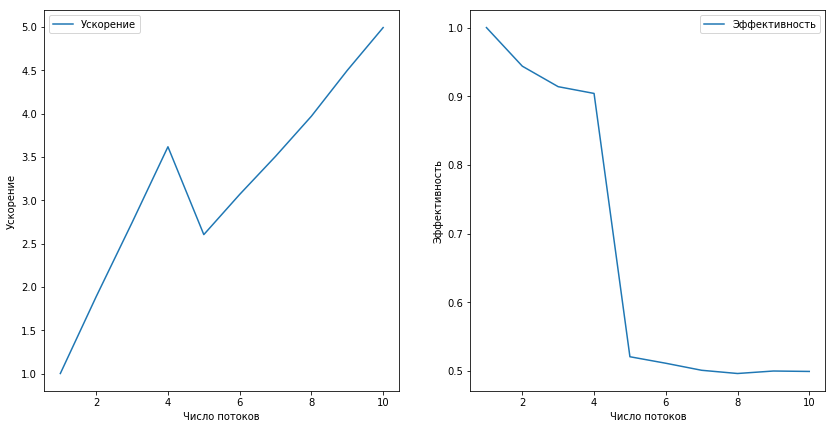

In [23]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.plot(grid, means[0] / means, label="Ускорение")
plt.xlabel("Число потоков")
plt.ylabel("Ускорение")
plt.legend()
plt.subplot(122)
plt.plot(grid, means[0] / means / grid, label="Эффективность")
plt.xlabel("Число потоков")
plt.ylabel("Эффективность")
plt.legend()
plt.show()

# Рисование картинки

In [31]:
X = []
n, m = 0, 0
decode_line = lambda line : tuple([int(x) for x in line.split(" ")])  
with open("state_copy.dat", "rt") as f:
    lines = f.readlines()
    n, m = decode_line(lines[0])
    for i in range(1, len(lines)):
        X.append(decode_line(lines[i]))
print(n, m)
print(X)

300 300
[(251, 252), (252, 253), (253, 251), (253, 252), (253, 253)]


In [37]:
set_x = set(X)
set_x

def get_colors(Z):
    return [1 if tuple(z) in set_x else 0 for z in Z]

get_colors([X[0], (5, 3)])

[1, 0]

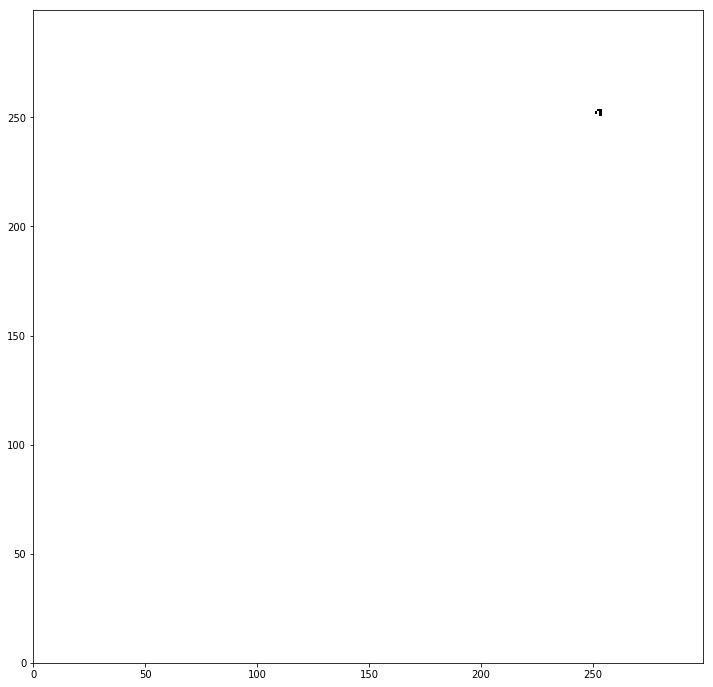

In [48]:
x_min, x_max = 0, n
y_min, y_max = 0, m
xx, yy = np.meshgrid(np.arange(x_min, x_max),
np.arange(y_min, y_max))
Z = get_colors(np.c_[xx.ravel(), yy.ravel()])

Z = np.array(Z).reshape(xx.shape)
cmap_bold = ListedColormap(['#FFFFFF', '#000000'])
plt.figure(figsize=(12, 12))
plt.pcolormesh(xx, yy, Z, cmap=cmap_bold)
# Plot also the training points
plt.show()